<html>
<body>
<h1 style="text-align:center; font-family: 'Arial', sans-serif; font-weight:bold; color:yellow; background-color:Black;padding:20px">
Sales Predicition
</h1>
</body>
</html>

In [132]:
# import all Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [133]:
#Upload dataset
df=pd.read_csv(r'D:\Data Analysis\IndoLike\Sales_of_Advertising\Dataset\advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [134]:
# Know Data Shape
df.shape

(200, 4)

In [135]:
#Explore our Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [136]:
#Explore Statistics of our data
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [137]:
#check for null values
df.isnull().sum()*100/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

##### There is no missing Values


<Axes: >

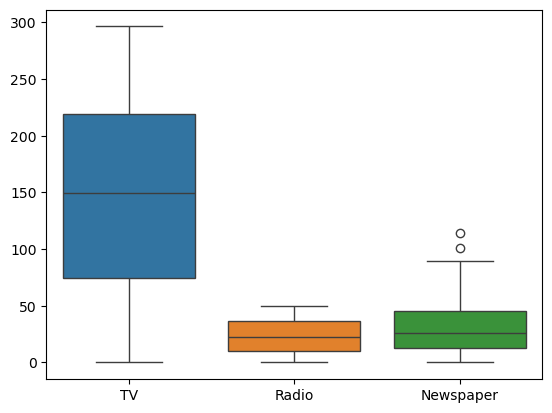

In [138]:
#Checking for Outliers
features=['TV' ,'Radio',	'Newspaper']	
sns.boxplot(data=df[features])

#### There is no outlier in this data


<hr style="border: 2px solid yellow; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#ffffff;">
1 . Exploratory Data Analysis
</h1>
<hr style="border: 2px solid yellow; width: 80%;">

### What is the relationship between advertising spend on TV, Radio, and Newspaper and Sales

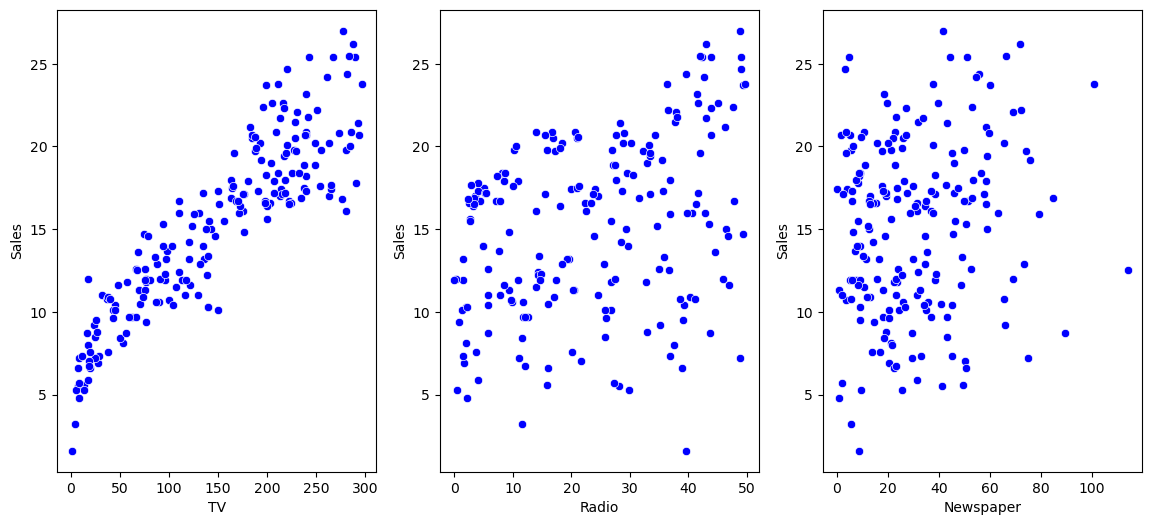

<Figure size 640x480 with 0 Axes>

In [139]:
#Relation Between Sales & All Types of Advertisements
plt.figure(figsize=(14,6))
c=0
for i in features :
    c+=1
    plt.subplot(1,3,c)
    sns.scatterplot(data=df ,x=df[i] ,y='Sales',color='Blue')
    
plt.show()
plt.tight_layout()

##### This present Linear relation between TV Advertisements & Sales

### Which advertising channel has the most significant impact on sales?

<Axes: >

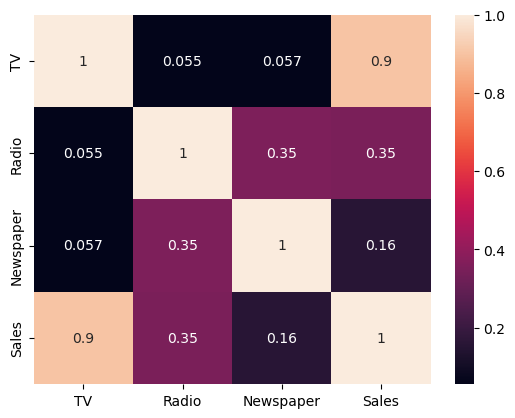

In [140]:
sns.heatmap(data=df.corr(),annot=True)

##### Advertisements of TV has most impact 

## Interaction effect between different advertising channels

In [141]:
# Effect of every type on the other
fig1 = px.scatter(df, x='TV', y='Radio',hover_data=['Sales'])

fig1.show()

fig2 = px.scatter(df, x='TV', y='Newspaper',hover_data=['Sales'])
fig2.show()


fig3 = px.scatter(df, x='Radio', y='Newspaper',hover_data=['Sales'])
fig3.show()


<hr style="border: 2px solid yellow; width: 80%;">
<h1 style="text-align:center; font-family: 'Arial', sans-serif; color:#ffffff;">
2 . Sales model predicition
</h1>
<hr style="border: 2px solid yellow; width: 80%;">

In [142]:
#Normalization of Numerical Data
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

numerical_col=['TV','Radio','Newspaper']
df[numerical_col]=scaler.fit_transform(df[numerical_col])

In [143]:
#Feature selection 
x=df[['TV','Radio','Newspaper']]
y=df['Sales']

In [144]:
from sklearn.model_selection import train_test_split
x_train ,x_test,y_train,y_test=train_test_split(x ,y,test_size=.3,random_state=42)

In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

lr = LinearRegression()

lr.fit(x_train, y_train)  # Ensure x_train and y_train are defined before this step


LinearRegression()

In [146]:
y_pred=lr.predict(x_test)


mae=mean_absolute_error(y_test ,y_pred)
acc=r2_score(y_test ,y_pred)

print(f"Error percentage :{(mae/100).round(2)}%")
print(f"Model Accuracy :{(acc*100):.2f}%")

Error percentage :0.01%
Model Accuracy :90.91%
